<img src="img/header.png"></img>

<h2> Menggunakan tweepy untuk Data Crawler </h2>

In [1]:
#!pip install tweepy

In [1]:
import tweepy
import pandas as pd

In [2]:
class Stream2Screen(tweepy.StreamListener):
	def on_status(self, status):
		if hasattr(status, 'retweeted_status'):
			try:
				tweet = status.retweeted_status.extended_tweet["full_text"]
			except:
				tweet = status.retweeted_status.text
		else:
			try:
				tweet = status.extended_tweet["full_text"]
			except AttributeError:
				tweet = status.text

In [3]:
consumer_key = "JEj5tRSA9JWjWV6imMOrUIVWV"        
consumer_secret = "7MEa00KHpUbjxble8pdlV74qPbvW2OHqLtjt45QQraJaAzRmAh"
access_token = "935208713551364097-W9Oy0IS2M1dRUQS5MZ6Dnz18BkHUP80"
access_secret = "jCANa7K7werTP2X1mnLlcRBFDHAJt9TZSCbC77FSNCj50"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [4]:
api = tweepy.API(auth) # # Construct the API instance
#api.update_status('tweepy + oauth!') # coba update status otomatis :D

In [5]:
user = api.get_user(935208713551364097)    
print(user.screen_name)

user = api.get_user(screen_name = 'BigDataFreeCode')
print(user.id)

BigDataFreeCode
935208713551364097


In [6]:
tweets = api.search(q="#detikcom", lang="id", count=10, tweet_mode="extended", listener=Stream2Screen())

In [7]:
all_tweets = []
for tweet in tweets:
    #print("--------------------")
    #print(tweet.full_text)
    #print("--------------------\n")
    all_tweets.append({"text": tweet.full_text})
tweets_df = pd.DataFrame(all_tweets)

In [8]:
print(tweets_df.values)

[["teruskan merajut merah putih, teruskan bangsa ini bersatu, jangan sampai pecah. Tapi soal kekuasaan, berikan kesempatan yang utuh pada Pak Jokowi-Ma'ruf Amin dengan nanti 5 tahun. Kita awasi dan itulah produk indah demokrasi.\n#detikcom #detikdotcom #TahuDaridetikcom https://t.co/ErMtOM56gG"]
 ['Keren...cakep...salut...merinding...kamu gmn bro? (admin)\n.\n#RYLAcademy #RYLifeCoach #RYLMotivasi #RYLWorkshop #detikdotcom #detikcom #indonesia #satuindonesia #nkri https://t.co/lrEkf753ui']
 ['#WAJIBTAHU #MMP #MALANGMARKETINGPROPERTY #JUALKEBUNAPEL #JUALMURAH #JUALKEBUN #KOTABATU #KOTASURABAYA #KOTAJAKARTA #KOTAMALANG #KABUPATENMALANG #RUMAH123 #KUMPARAN #OLX #BUKALAPAK #DETIKCOM HUBUNGI 08813459963 PAK KUS\n\nhttps://t.co/lYmbGszJzm https://t.co/q4LbQpfh34']
 ["https://t.co/NoLhDeLaMQ\n\nAssalamu'alaikum Warahmatullahi Wabarakatuh.\n#WAJIBTAHU #MMP #MALANGMARKETINGPROPERTY\n#JUALRUMAHMURAH #RUMAH123 #KOTAMALANG #JUALBELIRUMAH #KOTASURABAYA\n#RUMAHISLAMI #TOPNEWS #DETIKCOM #KUMPARAN #OLX

In [9]:
# export df to json
tweets_df.to_json('Data Crawling Tweet 10-2.json')

In [22]:
# coba print json tersebut
pd.options.display.max_colwidth = 500 # sesuaikan dgn maksimal karakter di tweet
tweets_json_df = pd.read_json('Data Crawling Tweet 10.json')
#print(tweets_json)
print(tweets_json_df[:5])

                                                                                                                                                                                                                                                                                                                 text
0                 teruskan merajut merah putih, teruskan bangsa ini bersatu, jangan sampai pecah. Tapi soal kekuasaan, berikan kesempatan yang utuh pada Pak Jokowi-Ma'ruf Amin dengan nanti 5 tahun. Kita awasi dan itulah produk indah demokrasi.\n#detikcom #detikdotcom #TahuDaridetikcom https://t.co/ErMtOM56gG
1                                                                                                                     Keren...cakep...salut...merinding...kamu gmn bro? (admin)\n.\n#RYLAcademy #RYLifeCoach #RYLMotivasi #RYLWorkshop #detikdotcom #detikcom #indonesia #satuindonesia #nkri https://t.co/lrEkf753ui
2                                        #WAJIBTAHU #MMP #MALANGMARKET

In [23]:
# join all text
print(len(tweets_json_df))
type(tweets_json_df)

6


pandas.core.frame.DataFrame

In [24]:
print(tweets_json_df.loc[0].values)

["teruskan merajut merah putih, teruskan bangsa ini bersatu, jangan sampai pecah. Tapi soal kekuasaan, berikan kesempatan yang utuh pada Pak Jokowi-Ma'ruf Amin dengan nanti 5 tahun. Kita awasi dan itulah produk indah demokrasi.\n#detikcom #detikdotcom #TahuDaridetikcom https://t.co/ErMtOM56gG"]


In [26]:
tweets_json_df['count'] = tweets_json_df['text'].str.split().str.len()
print(tweets_json_df)

                                                                                                                                                                                                                                                                                                                 text  \
0                 teruskan merajut merah putih, teruskan bangsa ini bersatu, jangan sampai pecah. Tapi soal kekuasaan, berikan kesempatan yang utuh pada Pak Jokowi-Ma'ruf Amin dengan nanti 5 tahun. Kita awasi dan itulah produk indah demokrasi.\n#detikcom #detikdotcom #TahuDaridetikcom https://t.co/ErMtOM56gG   
1                                                                                                                     Keren...cakep...salut...merinding...kamu gmn bro? (admin)\n.\n#RYLAcademy #RYLifeCoach #RYLMotivasi #RYLWorkshop #detikdotcom #detikcom #indonesia #satuindonesia #nkri https://t.co/lrEkf753ui   
2                                        #WAJIBTAHU #MMP #MAL

In [113]:
#update status
#api.update_status('a a b c d d e') # coba update status otomatis :D
#api.update_status('a b b d')
#api.update_status('#BigDataFilkomUB a c b d')

In [115]:
all_tweets2 = []
# search timeline status id_or_name
id_or_name = '935208713551364097'
#id_or_name = 'BigDataFreeCode'
for status in tweepy.Cursor(api.user_timeline, id=id_or_name, tweet_mode='extended').items():
    print(status.full_text)    
    #all_tweets2.append({"text": status.full_text})
    all_tweets2.append(status.full_text)
tweets_df2 = pd.DataFrame(all_tweets2)

tweepy + oauth!
Hi, Aku Cinta Indonesia #jokowi @jokowi
a c b d
a b b d
tweepy + data sicence indonesia
tweepy + oauth!


In [116]:
print(tweets_df2)

                                         0
0                          tweepy + oauth!
1  Hi, Aku Cinta Indonesia #jokowi @jokowi
2                                  a c b d
3                                  a b b d
4          tweepy + data sicence indonesia
5                          tweepy + oauth!


In [117]:
# hitung banyak kata tiap tweet
tweets_df2['count'] = tweets_df2[0].str.split().str.len()
print(tweets_df2)

                                         0  count
0                          tweepy + oauth!      3
1  Hi, Aku Cinta Indonesia #jokowi @jokowi      6
2                                  a c b d      4
3                                  a b b d      4
4          tweepy + data sicence indonesia      5
5                          tweepy + oauth!      3


In [119]:
type(all_tweets2)

list

In [120]:
print(all_tweets2)

['tweepy + oauth!', 'Hi, Aku Cinta Indonesia #jokowi @jokowi', 'a c b d', 'a b b d', 'tweepy + data sicence indonesia', 'tweepy + oauth!']


In [121]:
# split kata_n_other by space
split_kata_n_other = []
for item in all_tweets2:
    split_kata_n_other.extend(item.lower().split()) # gunakan lowe() untuk lowercase
    
print(split_kata_n_other)

print()

#hitung split_kata_n_other unik dan frekuensinya dengan dictionary
frek_kata_n_other_dict = {} 
  
for keys in split_kata_n_other: 
    frek_kata_n_other_dict[keys] = frek_kata_n_other_dict.get(keys, 0) + 1

print(frek_kata_n_other_dict)

print()

print(frek_kata_n_other_dict['tweepy'])

print()
values = []
keys = []
for key in frek_kata_n_other_dict.keys():
    keys.append(key)
    values.append(frek_kata_n_other_dict[key])
                
print(keys)
print(values)

['tweepy', '+', 'oauth!', 'hi,', 'aku', 'cinta', 'indonesia', '#jokowi', '@jokowi', 'a', 'c', 'b', 'd', 'a', 'b', 'b', 'd', 'tweepy', '+', 'data', 'sicence', 'indonesia', 'tweepy', '+', 'oauth!']

{'tweepy': 3, '+': 3, 'oauth!': 2, 'hi,': 1, 'aku': 1, 'cinta': 1, 'indonesia': 2, '#jokowi': 1, '@jokowi': 1, 'a': 2, 'c': 1, 'b': 3, 'd': 2, 'data': 1, 'sicence': 1}

3

['tweepy', '+', 'oauth!', 'hi,', 'aku', 'cinta', 'indonesia', '#jokowi', '@jokowi', 'a', 'c', 'b', 'd', 'data', 'sicence']
[3, 3, 2, 1, 1, 1, 2, 1, 1, 2, 1, 3, 2, 1, 1]


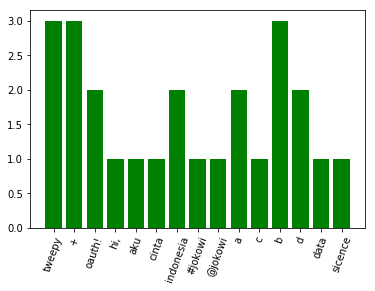

In [126]:
#plot frek_kata_n_other_dict
import matplotlib.pyplot as plt
plt.bar(list(frek_kata_n_other_dict.keys()), frek_kata_n_other_dict.values(), color='g')

plt.tick_params(axis='x', rotation=70)

plt.show()
plt.close()

### Untuk Data Crawling Streaming

In [13]:
stream2Screen = Stream2Screen()
stream = tweepy.Stream(auth=api.auth, listener=stream2Screen)

In [14]:
# Dalam contoh ini digunakan filter untuk streaming semua tweet yang berisi kata BigData
# Parameter track adalah istilah pencarian untuk streaming
#stream.filter(track='BigData')

In [15]:
# Dalam contoh ini digunakan filter untuk streaming semua tweet yang berisi kata BigData,
# lalu me-RT
# Parameter track adalah istilah pencarian untuk streaming
#stream.filter(track='BigData -RT')

# Dalam contoh ini digunakan filter untuk mem-block semua tweet yang berisi kata python,
# stream.filter(track=['python'], is_async=True)

In [16]:
# Dalam contoh ini digunakan filter untuk streaming tweet pada spesifik user by ID,
#stream.filter(follow=["935208713551364097"])

<img src="img/thumbs-up.png"></img>